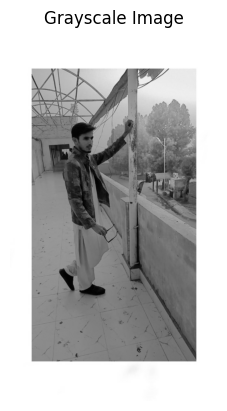

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load color image
img = cv2.imread('tahirjan.jpeg')  # Replace with your own image file
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Convert to grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
# Show grayscale image
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


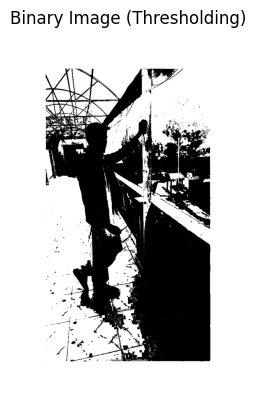

In [ ]:
# Convert grayscale to binary using a threshold
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# Show binary result
plt.imshow(binary, cmap='gray')
plt.title("Binary Image (Thresholding)")
plt.axis('off')
plt.show()


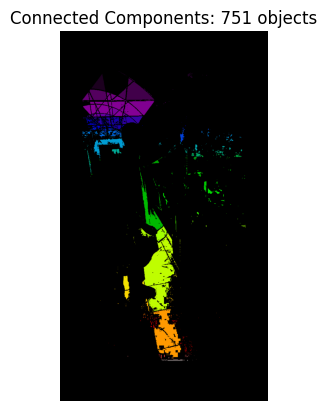

In [8]:
# Apply connected components labeling
num_labels, labels = cv2.connectedComponents(binary)
# Visualize labels
plt.imshow(labels, cmap='nipy_spectral')
plt.title(f"Connected Components: {num_labels - 1} objects")
plt.axis('off')
plt.show()


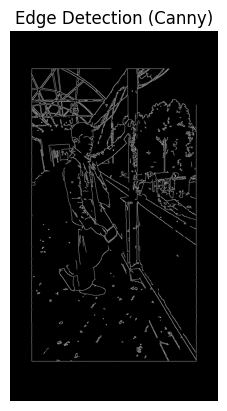

In [9]:
# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)
# Show edge-detected image
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.axis('off')
plt.show()


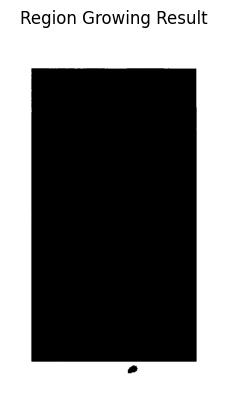

In [10]:
# Create empty image for the region mask
mask = np.zeros_like(gray, dtype=np.uint8)
# Choose a seed pixel (manually)
seed_point = (100, 100)  # You can adjust this
intensity_diff = 10
# Get seed pixel intensity
seed_val = gray[seed_point]
# Grow the region by checking similar neighbors
queue = [seed_point]
mask[seed_point] = 255
while queue:
    x, y = queue.pop(0)
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < gray.shape[0] and 0 <= ny < gray.shape[1]:
                if mask[nx, ny] == 0 and abs(int(gray[nx, ny]) - int(seed_val)) < intensity_diff:
                    mask[nx, ny] = 255
                    queue.append((nx, ny))
# Show region grown
plt.imshow(mask, cmap='gray')
plt.title("Region Growing Result")
plt.axis('off')
plt.show()


In [ ]:
import cv2

: 